# Steganography Operation using ASCII and XOR Technique

In [11]:
import cv2
import numpy as np
import string
import os
import matplotlib.pyplot as plt

In [12]:
#ASCII CONVERSION
d = {chr(i) : i for i in range (255)} # letter to ascii conversion       
c = {i : chr(i) for i in range (255)} # ascii to letter conversion

<function matplotlib.pyplot.show(close=None, block=None)>

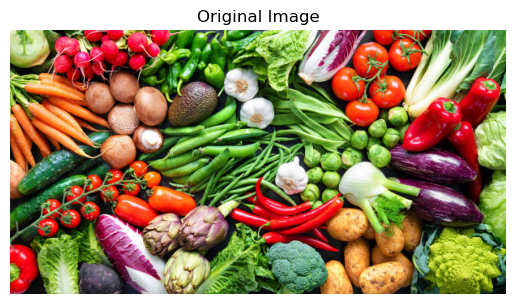

In [13]:
#Load the Image
image_path = r"C:\Users\HP\Desktop\CyberSecurity\org_image.jpg"
x = cv2.imread(image_path)
xrgb = cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(xrgb)
plt.title("Original Image")
plt.axis('off')
plt.show

In [14]:
x.shape

(326, 612, 3)

In [15]:
key = "123"
text = "secret"

print("Key: ", key)
print("Text: ", text)

Key:  123
Text:  secret


In [16]:
text_ascii = [d[ch] for ch in text] # list of ascii values of text characters
key_ascii = [d[ch] for ch in key] # list of ascii values of key
print(text_ascii)
print(key_ascii)

[115, 101, 99, 114, 101, 116]
[49, 50, 51]


# Encrypting the Image using Pixel Modification

In [ ]:
x_enc = x.copy()
n = 0   # number of rows
m = 0   # number of column
z = 0   # colour panel
l = len(text)   #length of text
kl = 0   # key length

for i in range(l):
    
    orig_val = x_enc[n,m,z]
    # print(x_enc[n,m,z])
    new_val = d[ text[i]] ^ d[key[kl] ]
    x_enc[n,m,z]=new_val

    print(f"Embedding '{text[i]}' (ASCII {d[text[i]]}) XOR '{key[kl]}' (ASCII {d[key[kl]]}) = {new_val} at pixel({n},{m},{z}) [original={orig_val}]")

    n = n + 1   # increment
    m = m + 1   # increment
    m = (m+1) % 3
    z = (z+1) % 3
    kl = (kl+1)%len(key)

Embedding 's' (ASCII 115) XOR '1' (ASCII 49) = 66 at pixel(0,0,0) [original=241]
Embedding 'e' (ASCII 101) XOR '2' (ASCII 50) = 87 at pixel(1,2,1) [original=239]
Embedding 'c' (ASCII 99) XOR '3' (ASCII 51) = 80 at pixel(2,1,2) [original=235]
Embedding 'r' (ASCII 114) XOR '1' (ASCII 49) = 67 at pixel(3,0,0) [original=207]
Embedding 'e' (ASCII 101) XOR '2' (ASCII 50) = 87 at pixel(4,2,1) [original=233]
Embedding 't' (ASCII 116) XOR '3' (ASCII 51) = 71 at pixel(5,1,2) [original=219]


In [18]:
cv2.imwrite("encrypt.jpg", x_enc)

True

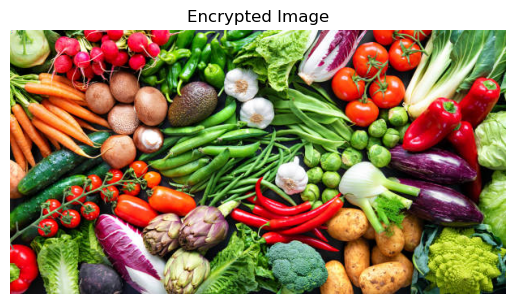

In [19]:
plt.imshow(cv2.cvtColor(x_enc,cv2.COLOR_BGR2RGB))
plt.title("Encrypted Image")
plt.axis('off')
plt.show()

# Decrypting the Image using Pixel Modification

In [20]:
n,m,z = 0,0,0
kl = 0
decrypt = ""

for i in range(l):
    
    val = x_enc[n,m,z]
    orig_char = c[ val ^ d[ key[kl] ] ]
    decrypt = decrypt + orig_char

    print(f"Decrypting pixel ({n},{m},{z}) : {val} XOR {d[key[kl]]} = {val ^ d[key[kl]]} -> '{orig_char}'")

    n = n + 1
    m = m + 1
    z = (z+1) % 3
    m = (m+1) % 3
    kl = (kl + 1) % len(key)

print(decrypt)


Decrypting pixel (0,0,0) : 66 XOR 49 = 115 -> 's'
Decrypting pixel (1,2,1) : 87 XOR 50 = 101 -> 'e'
Decrypting pixel (2,1,2) : 80 XOR 51 = 99 -> 'c'
Decrypting pixel (3,0,0) : 67 XOR 49 = 114 -> 'r'
Decrypting pixel (4,2,1) : 87 XOR 50 = 101 -> 'e'
Decrypting pixel (5,1,2) : 71 XOR 51 = 116 -> 't'
secret
